# Importing Packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Reading the Training Data

In [2]:
train_df=pd.read_csv("train.csv")

# Data View

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Card

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing Values

In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Filling Missing Values

In [6]:
train_df["Age"].fillna(train_df["Age"].mode()[0],inplace=True) #with mode

In [7]:
train_df.drop(["Cabin"],axis=1,inplace=True)  #dropping cabin because most of the values are null

# EDA

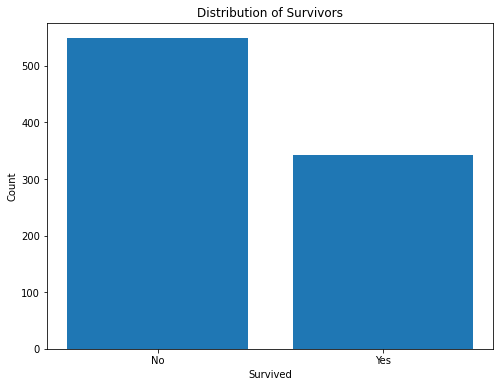

In [8]:
# 'Survived' - Distribution of survivors
survived_counts = train_df['Survived'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(survived_counts.index, survived_counts.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Distribution of Survivors')
plt.show()

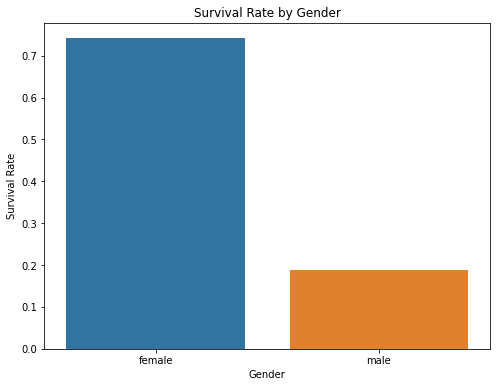

In [9]:
# 'Survived' - Survival rate by gender
survival_by_gender = train_df.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

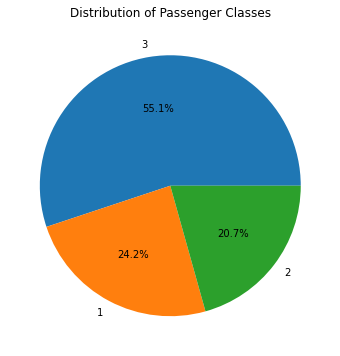

In [10]:
# 'Pclass' - Distribution of passenger classes
class_counts = train_df['Pclass'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Passenger Classes')
plt.show()

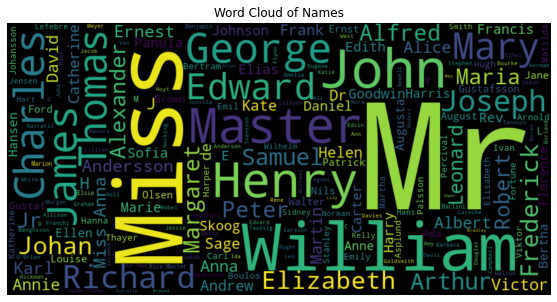

In [11]:
# 'Name' - Word cloud of names
from wordcloud import WordCloud

name_text = " ".join(train_df['Name'].values)
wordcloud = WordCloud(width=800, height=400).generate(name_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Names')
plt.show()

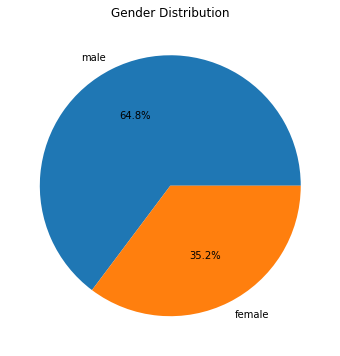

In [12]:
# 'Sex' - Gender distribution
sex_counts = train_df['Sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

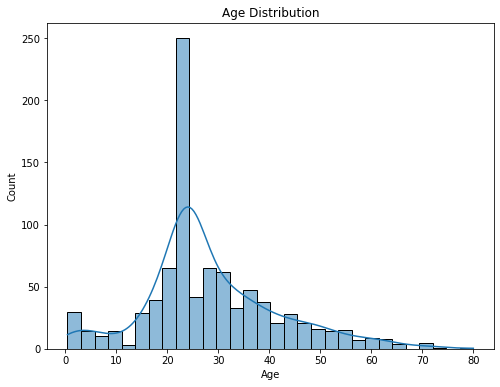

In [13]:
# 'Age' - Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

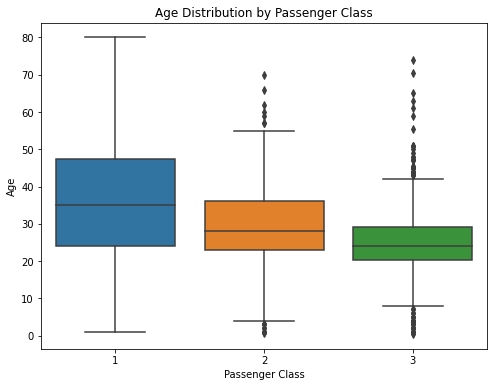

In [14]:
# 'Age' - Age by passenger class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class')
plt.show()

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


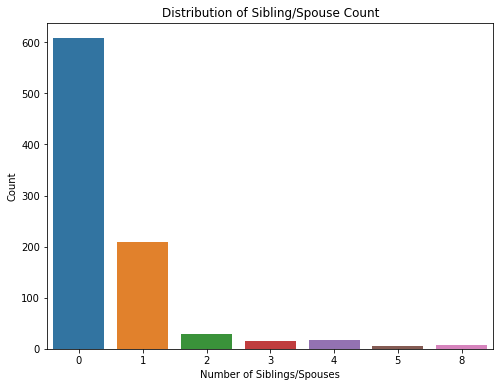

In [15]:
# 'SibSp' - Sibling/Spouse count
plt.figure(figsize=(8, 6))
sns.countplot(train_df['SibSp'])
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.title('Distribution of Sibling/Spouse Count')
plt.show()


c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


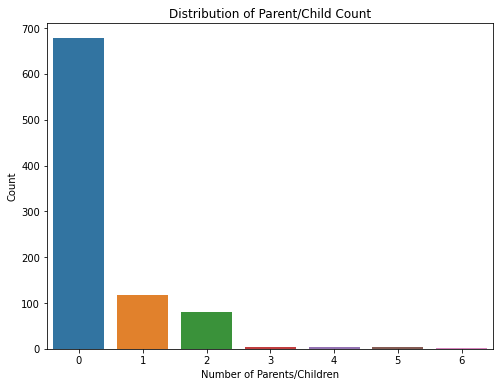

In [16]:
# 'Parch' - Parent/Child count
plt.figure(figsize=(8, 6))
sns.countplot(train_df['Parch'])
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.title('Distribution of Parent/Child Count')
plt.show()

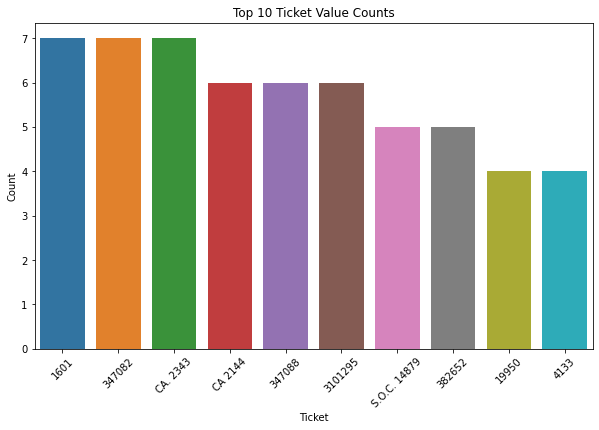

In [17]:
# 'Ticket' - Ticket value counts
ticket_counts = train_df['Ticket'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_counts.index, y=ticket_counts.values)
plt.xlabel('Ticket')
plt.ylabel('Count')
plt.title('Top 10 Ticket Value Counts')
plt.xticks(rotation=45)
plt.show()

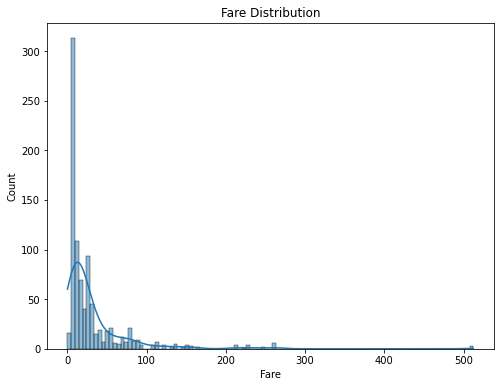

In [18]:
# 'Fare' - Fare distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Fare'], kde=True)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

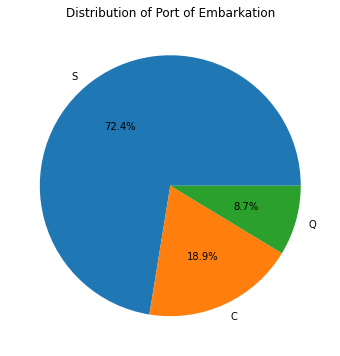

In [19]:
# 'Embarked' - Port of Embarkation distribution
embarked_counts = train_df['Embarked'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Port of Embarkation')
plt.show()

# ML Model Preparation

In [20]:
#ropping un-related cols
train_df.drop(["Name","Ticket","PassengerId","Embarked"],axis=1,inplace=True)

In [21]:
# data encoding--> Replace Male with 1 and Female with 0
train_df["Sex"]=train_df["Sex"].apply(lambda x:1 if x=="male" else 0)

# Importing the Model

In [22]:
from sklearn.linear_model import LogisticRegression

# Separaating Input and Output Features

In [23]:
X=train_df.drop(["Survived"],axis=1)

In [24]:
y=train_df["Survived"]

In [25]:
lr=LogisticRegression()

# Model Training

In [26]:
lr.fit(X,y) 

LogisticRegression()

# Reading the Testing Dat

In [27]:
test_df=pd.read_csv("test.csv")

In [28]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
# Dropping Cols and Imputing Missing values with same intuition as with training data

In [30]:
test_df.drop(["Name","Ticket","PassengerId","Embarked","Cabin"],axis=1,inplace=True)

In [31]:
test_df["Age"].fillna(test_df["Age"].mode()[0],inplace=True)
test_df["Fare"].fillna(test_df["Fare"].mode()[0],inplace=True)

In [32]:
test_df["Sex"]=test_df["Sex"].apply(lambda x:1 if x=="male" else 0)

# Generating Predictions

In [33]:
lr.predict(test_df)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,